In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv('RELIANCE.NS.csv')

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-04,2492.949951,2504.899902,2490.000000,2498.850098,2491.349365,787160
1,2021-11-08,2519.399902,2520.000000,2456.399902,2501.949951,2494.439941,9385607
2,2021-11-09,2505.000000,2528.899902,2487.050049,2521.699951,2514.130615,7237470
3,2021-11-10,2516.699951,2558.000000,2503.649902,2549.899902,2542.245850,4731975
4,2021-11-11,2540.050049,2570.500000,2535.550049,2554.550049,2546.882080,4948422
...,...,...,...,...,...,...,...
244,2022-10-31,2541.000000,2560.949951,2532.199951,2549.600098,2549.600098,5731802
245,2022-11-01,2600.000000,2600.000000,2508.000000,2529.850098,2529.850098,6443999
246,2022-11-02,2532.300049,2550.199951,2515.000000,2545.649902,2545.649902,4145144
247,2022-11-03,2529.850098,2559.550049,2525.050049,2555.149902,2555.149902,3089026


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-04,2492.949951,2504.899902,2490.000000,2498.850098,2491.349365,787160
1,2021-11-08,2519.399902,2520.000000,2456.399902,2501.949951,2494.439941,9385607
2,2021-11-09,2505.000000,2528.899902,2487.050049,2521.699951,2514.130615,7237470
3,2021-11-10,2516.699951,2558.000000,2503.649902,2549.899902,2542.245850,4731975
4,2021-11-11,2540.050049,2570.500000,2535.550049,2554.550049,2546.882080,4948422


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
244,2022-10-31,2541.000000,2560.949951,2532.199951,2549.600098,2549.600098,5731802
245,2022-11-01,2600.000000,2600.000000,2508.000000,2529.850098,2529.850098,6443999
246,2022-11-02,2532.300049,2550.199951,2515.000000,2545.649902,2545.649902,4145144
247,2022-11-03,2529.850098,2559.550049,2525.050049,2555.149902,2555.149902,3089026
248,2022-11-04,2553.899902,2590.949951,2551.100098,2584.500000,2584.500000,3074007


In [7]:
data.describe

<bound method NDFrame.describe of            Date         Open         High          Low        Close  \
0    2021-11-04  2492.949951  2504.899902  2490.000000  2498.850098   
1    2021-11-08  2519.399902  2520.000000  2456.399902  2501.949951   
2    2021-11-09  2505.000000  2528.899902  2487.050049  2521.699951   
3    2021-11-10  2516.699951  2558.000000  2503.649902  2549.899902   
4    2021-11-11  2540.050049  2570.500000  2535.550049  2554.550049   
..          ...          ...          ...          ...          ...   
244  2022-10-31  2541.000000  2560.949951  2532.199951  2549.600098   
245  2022-11-01  2600.000000  2600.000000  2508.000000  2529.850098   
246  2022-11-02  2532.300049  2550.199951  2515.000000  2545.649902   
247  2022-11-03  2529.850098  2559.550049  2525.050049  2555.149902   
248  2022-11-04  2553.899902  2590.949951  2551.100098  2584.500000   

       Adj Close   Volume  
0    2491.349365   787160  
1    2494.439941  9385607  
2    2514.130615  7237470  
3

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [15]:
data.drop('Date',axis=1,inplace=True)

In [13]:
data.drop('Adj Close',axis=1,inplace=True)

In [16]:
data.head()

,Open,High,Low,Close,Volume
0,2492.949951,2504.899902,2490.000000,2498.850098,787160
1,2519.399902,2520.000000,2456.399902,2501.949951,9385607
2,2505.000000,2528.899902,2487.050049,2521.699951,7237470
3,2516.699951,2558.000000,2503.649902,2549.899902,4731975
4,2540.050049,2570.500000,2535.550049,2554.550049,4948422


In [20]:
data_X = data.loc[:,data.columns !=  'Close' ]
data_Y = data['Close']

In [22]:
print(data_X)
print(data_Y)

            Open         High          Low   Volume
0    2492.949951  2504.899902  2490.000000   787160
1    2519.399902  2520.000000  2456.399902  9385607
2    2505.000000  2528.899902  2487.050049  7237470
3    2516.699951  2558.000000  2503.649902  4731975
4    2540.050049  2570.500000  2535.550049  4948422
..           ...          ...          ...      ...
244  2541.000000  2560.949951  2532.199951  5731802
245  2600.000000  2600.000000  2508.000000  6443999
246  2532.300049  2550.199951  2515.000000  4145144
247  2529.850098  2559.550049  2525.050049  3089026
248  2553.899902  2590.949951  2551.100098  3074007

[249 rows x 4 columns]
0      2498.850098
1      2501.949951
2      2521.699951
3      2549.899902
4      2554.550049
          ...     
244    2549.600098
245    2529.850098
246    2545.649902
247    2555.149902
248    2584.500000
Name: Close, Length: 249, dtype: float64


In [25]:
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.25)

In [31]:
regressor = LinearRegression()
regressor.fit(train_X,train_y)

LinearRegression()

In [32]:
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)

Prediction Score :  0.98809424155442
Mean Squared Error :  142.19536445030266


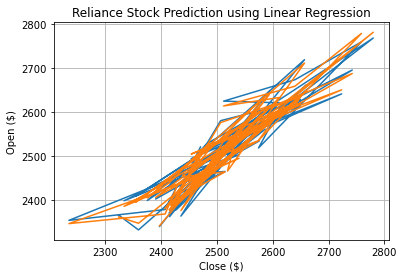

In [35]:
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set(xlabel='Close ($)',ylabel='Open ($)', title='Reliance Stock Prediction using Linear Regression')
ax.plot(test_X['Open'],test_y)
ax.plot(test_X['Open'],predict_y)
fig.savefig('LRPlot.png')
plt.show()